# Research Question
How do social media addiction levels vary across countries and academic levels, and how are higher addiction levels associated with students’ mental health, conflict frequency, and perceived academic impact?

# Hypothesis
Students with higher social media addiction scores will report greater negative impacts on overall well-being, including lower mental health scores, more frequent social conflicts, and a higher likelihood of perceiving social media as detrimental to their academic performance. Additionally, higher addiction levels are expected to be more prevalent among students at lower academic levels.

In [1]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df_stusocmed = pd.read_csv('Students Social Media Addiction.csv')

## Initial Visual Analysis and Cleaning

In [4]:
#quick visual analysis of the dataset
#review the first few records
df_stusocmed.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
#review the last few records
df_stusocmed.tail()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
700,701,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,702,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,703,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,704,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4
704,705,19,Female,Undergraduate,Poland,6.2,Facebook,Yes,6.3,5,Single,4,8


In [6]:
#review a random sample of records
df_stusocmed.sample(10, random_state = 2)

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
328,329,19,Female,Undergraduate,France,4.5,Instagram,No,7.5,7,In Relationship,2,5
227,228,22,Male,Graduate,Russia,4.8,VKontakte,No,7.2,7,Single,2,5
280,281,19,Female,Undergraduate,Japan,3.1,LINE,No,8.5,8,Single,1,3
37,38,19,Female,High School,UAE,6.2,Instagram,Yes,5.1,5,In Relationship,4,9
530,531,20,Female,Undergraduate,Brazil,5.9,TikTok,Yes,6.6,6,Single,3,7
480,481,19,Female,Undergraduate,Spain,3.6,Instagram,Yes,8.3,6,Single,3,7
272,273,19,Female,Undergraduate,Japan,3.2,LINE,No,8.4,8,Single,1,3
633,634,20,Male,Undergraduate,Russia,6.9,Instagram,Yes,5.9,4,Single,5,9
632,633,23,Female,Graduate,Italy,4.8,Twitter,No,7.1,7,In Relationship,2,5
171,172,22,Male,Graduate,Maldives,5.3,TikTok,Yes,5.7,6,In Relationship,4,8


In [7]:
#take a look at the structure of the data, including column names, datatypes, and number of entries
df_stusocmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

In [8]:
#drop unnecessary columns by selecting only the desired columns
df_cleaned = df_stusocmed[['Student_ID', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours', 'Affects_Academic_Performance', 'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Conflicts_Over_Social_Media', 'Addicted_Score']].copy()

In [9]:
#review cleaned data for accuracy
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Academic_Level                705 non-null    object 
 2   Country                       705 non-null    object 
 3   Avg_Daily_Usage_Hours         705 non-null    float64
 4   Affects_Academic_Performance  705 non-null    object 
 5   Sleep_Hours_Per_Night         705 non-null    float64
 6   Mental_Health_Score           705 non-null    int64  
 7   Conflicts_Over_Social_Media   705 non-null    int64  
 8   Addicted_Score                705 non-null    int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 49.7+ KB


In [10]:
df_cleaned.head()

,Student_ID,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,1,Undergraduate,Bangladesh,5.2,Yes,6.5,6,3,8
1,2,Graduate,India,2.1,No,7.5,8,0,3
2,3,Undergraduate,USA,6.0,Yes,5.0,5,4,9
3,4,High School,UK,3.0,No,7.0,7,1,4
4,5,Graduate,Canada,4.5,Yes,6.0,6,2,7


In [11]:
#determine average daily usage hours per country
hrs_by_country = df_cleaned.groupby('Country')['Avg_Daily_Usage_Hours'].mean()
hrs_by_country

Country
Afghanistan     2.9
Albania         4.7
Andorra         5.3
Argentina       5.5
Armenia         5.9
               ... 
Uzbekistan      5.5
Vatican City    4.4
Venezuela       3.3
Vietnam         3.6
Yemen           4.7
Name: Avg_Daily_Usage_Hours, Length: 110, dtype: float64

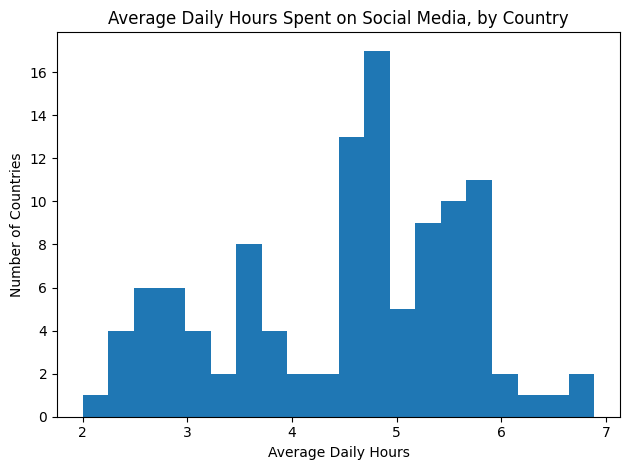

In [12]:
#create average daily hours visual for visual analysis
plt.figure()
hrs_by_country.plot.hist(bins=20)
plt.title("Average Daily Hours Spent on Social Media, by Country")
plt.ylabel("Number of Countries")
plt.xlabel("Average Daily Hours")
plt.tight_layout()
plt.show();

### Finding Breaks for Comparison
In reviewing the histogram representing the average daily hours spent on social media, grouped by country, it quickly becomes clear that we have a break around 4.5 hours per day. 

In [13]:
hrs_by_edlevel = df_cleaned.groupby('Academic_Level')['Avg_Daily_Usage_Hours'].mean()
hrs_by_edlevel

Academic_Level
Graduate         4.776923
High School      5.544444
Undergraduate    5.001416
Name: Avg_Daily_Usage_Hours, dtype: float64

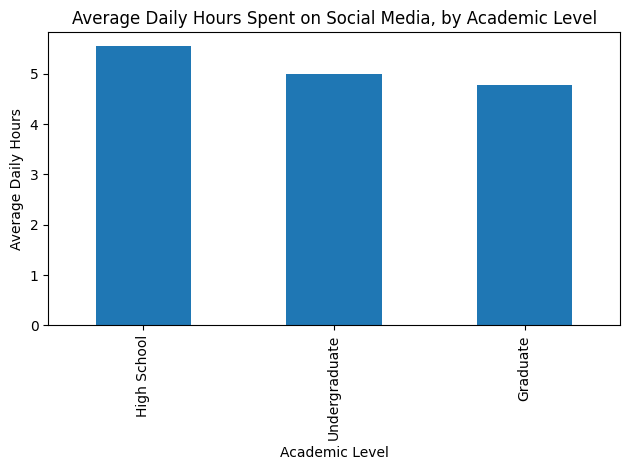

In [14]:
#create average daily hours visual for visual analysis
plt.figure()
hrs_by_edlevel.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Daily Hours Spent on Social Media, by Academic Level")
plt.ylabel("Average Daily Hours")
plt.xlabel("Academic Level")
plt.tight_layout()
plt.show();

This bar chart shows the average daily hours spent on social media, but grouped by academic level this time. While the differences are not vast, the trend shows that students at higher academic levels tend to spend slightly less time per day on social media, on average.

## Deeper Analysis

To support a more nuanced understanding, the analysis will be conducted in two phases: once for each subset of the data, split by average daily usage.

In [15]:
#definte the threshold
threshold = 4.5

# split the cleaned dataframe into two new dataframes
df_low_usage = df_cleaned[df_cleaned['Avg_Daily_Usage_Hours'] < threshold].copy()
df_high_usage = df_cleaned[df_cleaned['Avg_Daily_Usage_Hours'] >= threshold].copy()

In [16]:
#check split - low end
df_low_usage.head()

,Student_ID,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
1,2,Graduate,India,2.1,No,7.5,8,0,3
3,4,High School,UK,3.0,No,7.0,7,1,4
6,7,Graduate,Germany,1.5,No,8.0,9,0,2
8,9,High School,Japan,4.0,No,6.5,7,1,5
9,10,Graduate,South Korea,3.3,No,7.0,7,1,4


In [17]:
df_low_usage.shape

(259, 9)

In [18]:
#check split - high end
df_high_usage.head()

,Student_ID,Academic_Level,Country,Avg_Daily_Usage_Hours,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
0,1,Undergraduate,Bangladesh,5.2,Yes,6.5,6,3,8
2,3,Undergraduate,USA,6.0,Yes,5.0,5,4,9
4,5,Graduate,Canada,4.5,Yes,6.0,6,2,7
5,6,Undergraduate,Australia,7.2,Yes,4.5,4,5,9
7,8,Undergraduate,Brazil,5.8,Yes,6.0,6,2,8


In [19]:
df_high_usage.shape

(446, 9)

### Analysis Round 1 - High Social Media Usage

In [20]:
# function for creating the scatterplot with line of best fit

def scatter_with_line(df, x_column, y_column):
    sns.lmplot(data=df, x=x_column, y=y_column, aspect=1.5)

    plt.title("Scatter Plot with Line of Best Fit")
    plt.xlabel(x_column)
    plt.ylabel(y_column)
    plt.tight_layout()
    plt.show()

In [21]:
# function for determining OLS regression

def OLS_function(df, x_column, y_column):
    X = df[x_column]
    y = df[y_column]

    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f"OLS Regression: {y_column} ~ {x_column}\n")
    print(model.summary())

The above functions were created to maintain the DRY (don't repeat yourself) principle of software coding. To test our hypothesis by comparing multiple variables against addiction scores, creating functions for our scatterplot with a line of best fit, and our correlation coefficient will keep our code clean and analysis more efficient. 

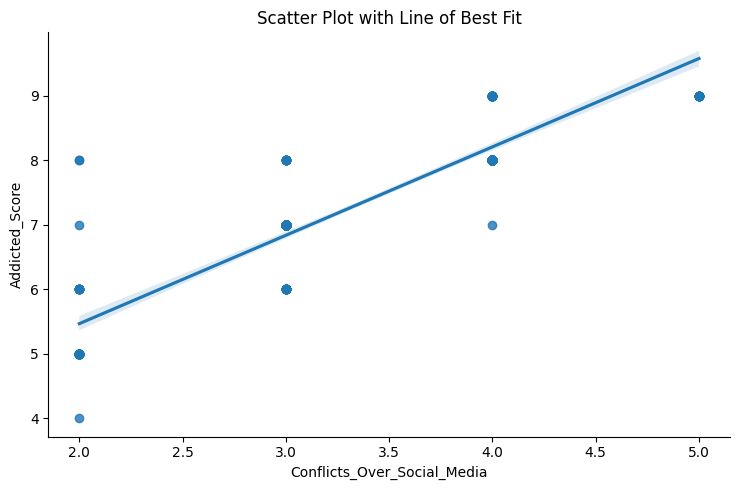

In [22]:
#scatter plot for number of conflicts on social media
scatter_with_line(df_high_usage, 'Conflicts_Over_Social_Media', 'Addicted_Score')

In [23]:
#OLS regression number of conflicts on social media
OLS_function(df_high_usage, 'Conflicts_Over_Social_Media', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Conflicts_Over_Social_Media

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     2105.
Date:                Sat, 31 May 2025   Prob (F-statistic):          1.36e-170
Time:                        14:33:56   Log-Likelihood:                -299.74
No. Observations:                 446   AIC:                             603.5
Df Residuals:                     444   BIC:                             611.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

The scatterplot relating Addiction Score and Conflicts Over Social Media visually reflects a strong relationship between the two variables. We see that, as the addiction score rises, so does the number of conflicts experienced. This is further reinforced by our regression results. Our R-squared value of 0.826 indicates that approximately 82.6% of the variation in addiction scores can be explained by the number of social conflicts reported, suggesting a very strong relationship in this dataset. Our p-value being well below 0.05 indicates that this is a statistically significant result.

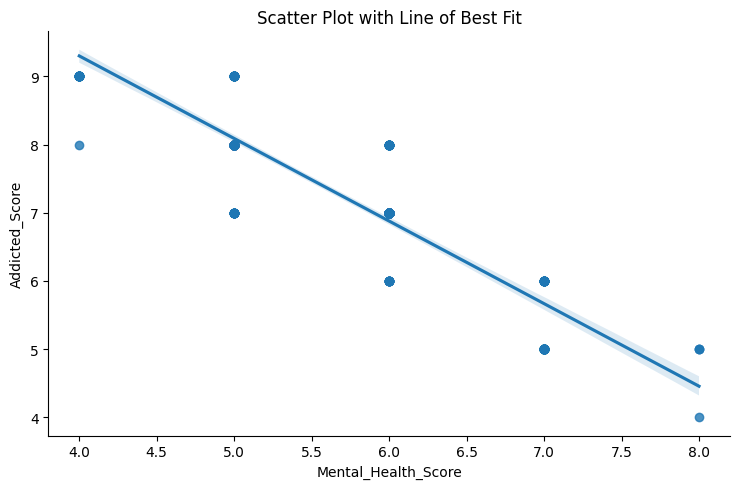

In [24]:
#scatterplot for mental health score
scatter_with_line(df_high_usage, 'Mental_Health_Score', 'Addicted_Score')

In [25]:
#OLS regression for mental health score
OLS_function(df_high_usage, 'Mental_Health_Score', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Mental_Health_Score

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     1846.
Date:                Sat, 31 May 2025   Prob (F-statistic):          2.94e-160
Time:                        14:34:35   Log-Likelihood:                -323.64
No. Observations:                 446   AIC:                             651.3
Df Residuals:                     444   BIC:                             659.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Our visual for mental health scores vs addiction score again shows a strong relationship between the two. We see a negative relationship here, though, where a higher addiction score means a lower mental health score, and vice versa. Our regression results strongly support this visual. Again, we are looking at an R-squared value that shows over 80% of the variation in addiction scores can be explained by our mental health score. Another p-value under the standard alpha level of 0.05 shows us that this is a statistically significant result and unlikely to be due to chance.

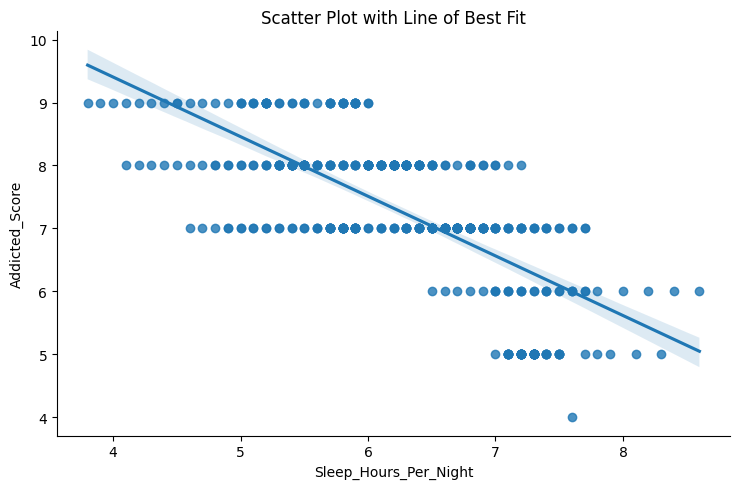

In [26]:
#scatterplot for average number of sleep hours
scatter_with_line(df_high_usage, 'Sleep_Hours_Per_Night', 'Addicted_Score')

In [27]:
#OLS regression for average number of sleep hours
OLS_function(df_high_usage, 'Sleep_Hours_Per_Night', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Sleep_Hours_Per_Night

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.519
Model:                            OLS   Adj. R-squared:                  0.518
Method:                 Least Squares   F-statistic:                     478.9
Date:                Sat, 31 May 2025   Prob (F-statistic):           1.49e-72
Time:                        14:35:10   Log-Likelihood:                -526.27
No. Observations:                 446   AIC:                             1057.
Df Residuals:                     444   BIC:                             1065.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

This is the weakest relationship we have seen thus far, both visually and via our regression results. While our p-value still indicates that it is a statistically significant result, our R-squared value is 0.519. While this does tell us that over half, or 51.9%, of the variation in addiction score can be explained by the average hours of sleep per night, this is indicative of a weaker relationship than our other two comparisons thus far. This makes sense, as, especially in the life of a student, there are a large number of factors that could impact average number of hours of sleep per night. Students deal with studying for tests, social obligations, and other activities that can cut into their sleep time. However, we do still see that those with higher addiction scores are more likely to sleep less at night than those with lower addicted scores.

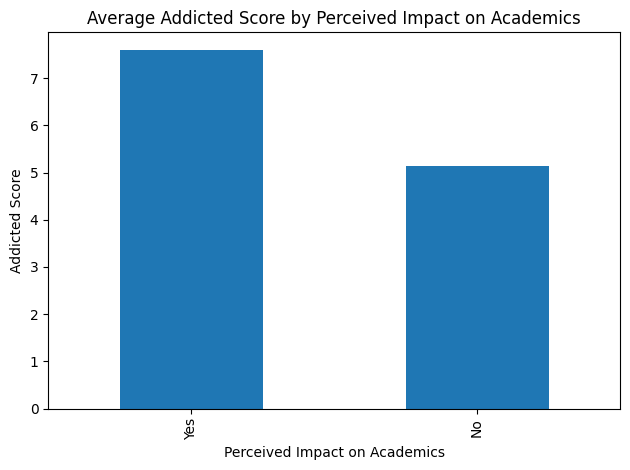

In [29]:
#aggregation of perceived academic impact vs addicted score
average_addicted = df_high_usage.groupby('Affects_Academic_Performance')['Addicted_Score'].mean()

plt.figure()
average_addicted.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Addicted Score by Perceived Impact on Academics")
plt.ylabel("Addicted Score")
plt.xlabel("Perceived Impact on Academics")
plt.tight_layout()
plt.show();

Looking at the average addicted score by whether or not students feel their social media use affects their academic performance, we do see that students with higher addicted scores are more likely to think their social media use affects their education. However, if this were a true indication of academic performance, we would expect to see a lower average addiction score for those students who do not believe that their academic performance is affected. The score we see for those students, is around 5 on a scale out of 10, not close to a 1 or 2 as one would expect. This shows us that there is a level of bias in this particular variable in our survey data.

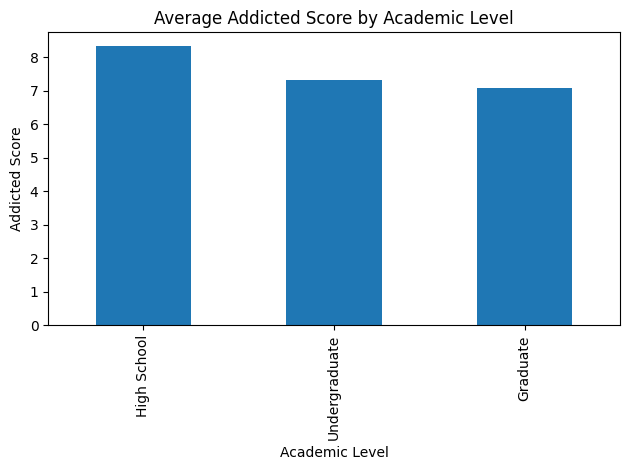

In [30]:
#aggregation of academic level by addicted score - specifically within the split dataset
academic_level = df_high_usage.groupby('Academic_Level')['Addicted_Score'].mean()

plt.figure()
academic_level.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Addicted Score by Academic Level")
plt.ylabel("Addicted Score")
plt.xlabel("Academic Level")
plt.tight_layout()
plt.show();

This graph reflects what we expected to see based on our hypothesis, and matches what we saw when comparing Academic Levels to average daily usage. The younger our students, the higher the average addiction score we see. There isn't a large difference in the scores in general, but the scores between undergraduate and graduate students are much closer together (sitting right around 7) than the scores for our high school students (8). This makes sense with what is widely known about brain development and impulse control in young adults - the brain is not fully developed until one reaches their mid-20s, which would encompass our graduate students especially, but some of our undergraduate students as well. 

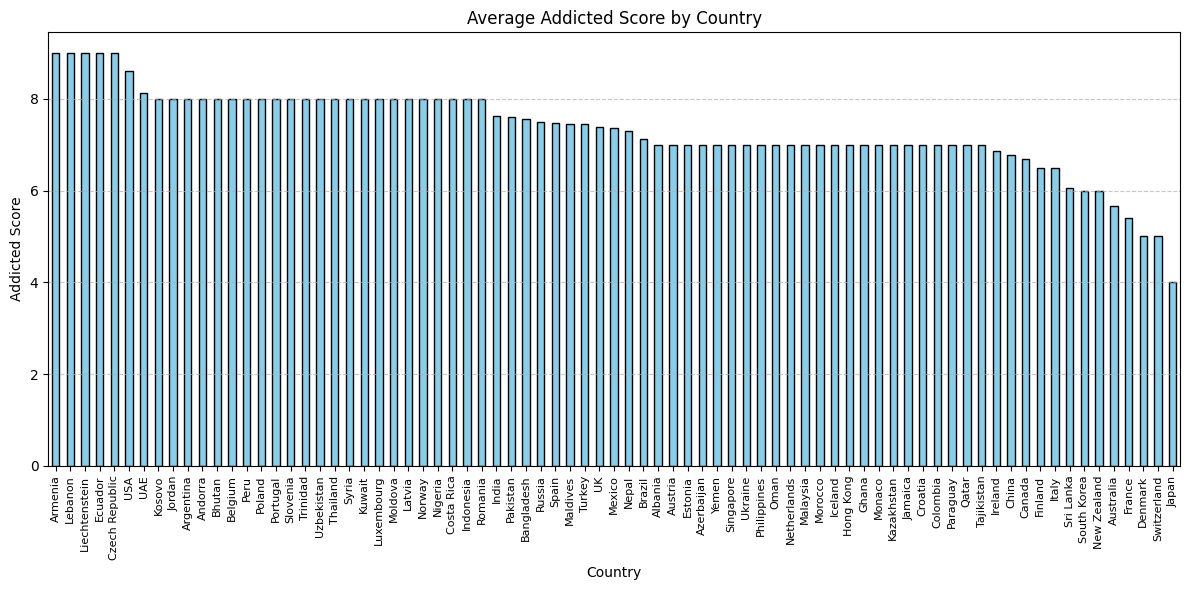

In [31]:
#addicted score by country
addicted_by_country = df_high_usage.groupby('Country')['Addicted_Score'].mean()

plt.figure(figsize=(12, 6))
addicted_by_country.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Addicted Score by Country")
plt.ylabel("Addicted Score")
plt.xlabel("Country")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


Though we are looking at the countries with the highest average daily social media use, the addicted scores we see have a pretty wide range. Most the scores of our selected countries are in the upper half of our addicted score scale, but not all of them. There appears to be a realtionship between addicted score and hours of use, but we cannot determine that for sure until we look at our lower set.

#### Initial Conclusions based on High-Usage Data

Our initial data analysis shows that our younger students are more susceptible to becoming addicted to social media, though our older students are not far behind. Relationships between factors like social conflicts, hours of sleep, mental health score, and social media addiction score are strong. The more addicted to social media a student is, the more their mental health and sleep are likely to suffer, and the more likely they are to have conflicts with peers on social media platforms. We also see a potential for bias in whether social media addiction affects academic performance, as this was a self-reported metric in our survey data. While all of this is true of our students in countries with the highest average daily social media use, we cannot make any definitive conclusions until we examine the rest of our dataset. 

### Analysis Round 2 - Low Social Media Usage

For our second round of analysis, we will utilize the same functions created during our first round of analysis. We will apply those functions to our low usage dataframe this time around to see if we see the same trends emerge. 

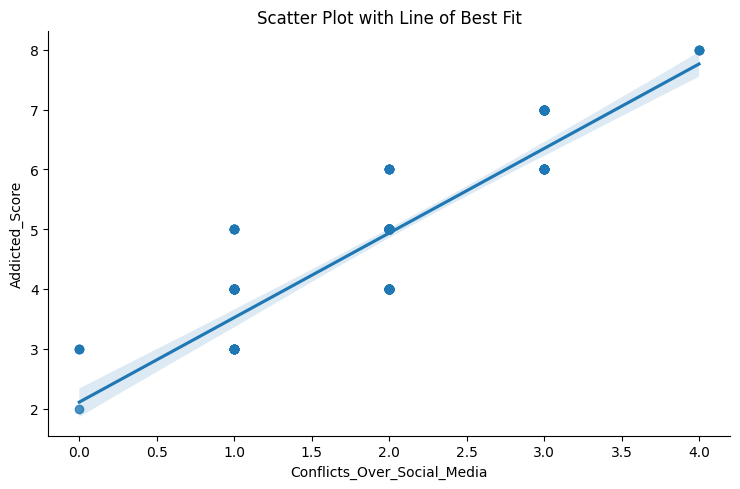

In [32]:
#scatter plot for number of conflicts on social media
scatter_with_line(df_low_usage, 'Conflicts_Over_Social_Media', 'Addicted_Score')

In [33]:
#OLS regression for number of conflicts on social media
OLS_function(df_low_usage, 'Conflicts_Over_Social_Media', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Conflicts_Over_Social_Media

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     718.6
Date:                Sat, 31 May 2025   Prob (F-statistic):           2.06e-76
Time:                        14:38:02   Log-Likelihood:                -246.02
No. Observations:                 259   AIC:                             496.0
Df Residuals:                     257   BIC:                             503.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

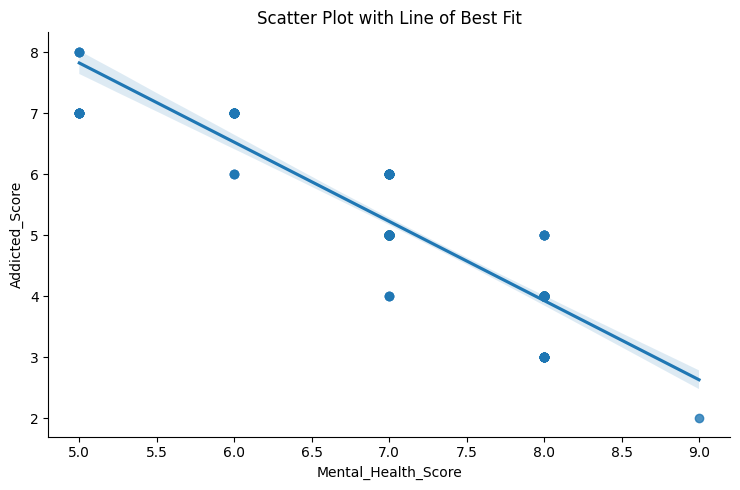

In [34]:
#scatterplot for mental health score
scatter_with_line(df_low_usage, 'Mental_Health_Score', 'Addicted_Score')

In [35]:
#OLS regression coefficient for mental health score
OLS_function(df_low_usage, 'Mental_Health_Score', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Mental_Health_Score

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1354.
Date:                Sat, 31 May 2025   Prob (F-statistic):          1.95e-104
Time:                        14:38:15   Log-Likelihood:                -181.06
No. Observations:                 259   AIC:                             366.1
Df Residuals:                     257   BIC:                             373.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

Here we actually see a slightly stronger relationship than we did with our higher usage dataset. Again, the higher the social media usage, the more likely we are to see a lower mental health score. In this dataset though, we're seeing larger mental health scores than we did previously. Our p-value is still under the standard 0.05 alpha level indicating a statistically significant result, and an R-squared value of 0.840 shows a very strong relationship, indeed.

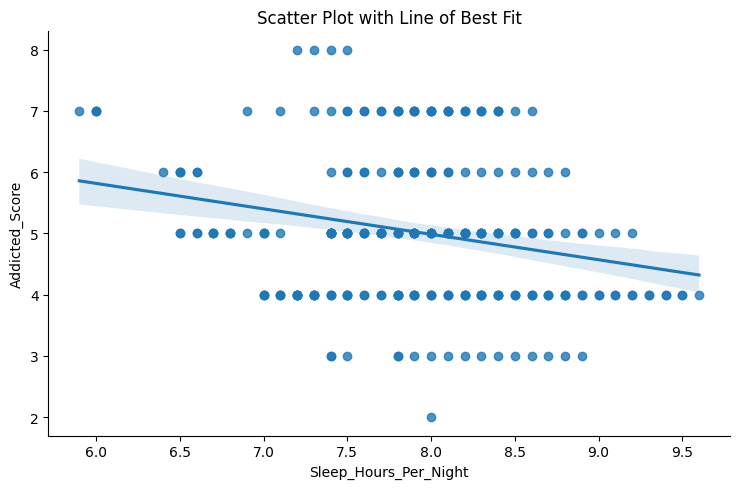

In [36]:
#scatterplot for average number of sleep hours
scatter_with_line(df_low_usage, 'Sleep_Hours_Per_Night', 'Addicted_Score')

In [37]:
#OLS regression for average number of sleep hours
OLS_function(df_low_usage, 'Sleep_Hours_Per_Night', 'Addicted_Score')

OLS Regression: Addicted_Score ~ Sleep_Hours_Per_Night

                            OLS Regression Results                            
Dep. Variable:         Addicted_Score   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     15.17
Date:                Sat, 31 May 2025   Prob (F-statistic):           0.000125
Time:                        14:38:41   Log-Likelihood:                -411.35
No. Observations:                 259   AIC:                             826.7
Df Residuals:                     257   BIC:                             833.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

This is our weakest relationship yet, with an R-squared value of 0.056. Only 5.6% of the variation in addiction scores can be explained by hours of sleep per night in our lower-usage dataset! While there is still a slight relationship between hours of sleep and addiction score, it is not nearly as apparent. On the whole, students in this dataset are getting more hours of sleep, on average, per night. With this being our dataset with lower daily average social media use, this makes sense. With less time per day spent on social media, there are more hours in the day open to all other obligations students have: school, social, and sleep!

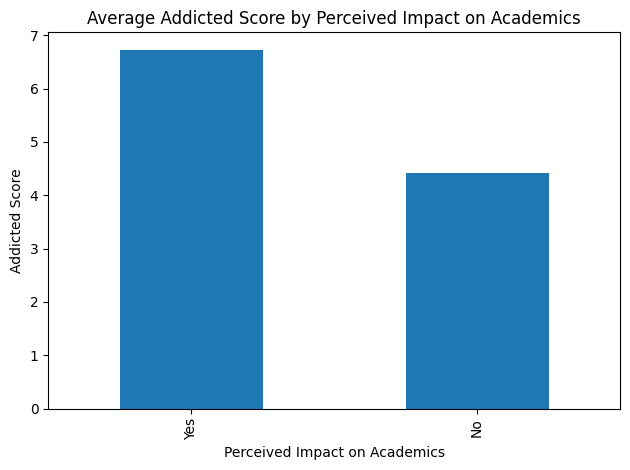

In [38]:
#aggregation of perceived academic impact vs addicted score
average_addicted = df_low_usage.groupby('Affects_Academic_Performance')['Addicted_Score'].mean()

plt.figure()
average_addicted.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Addicted Score by Perceived Impact on Academics")
plt.ylabel("Addicted Score")
plt.xlabel("Perceived Impact on Academics")
plt.tight_layout()
plt.show();

The primary difference we see here is that our highest average social media addiction scores are not as high as they were in our last dataset. We do still see the same opportunity for bias, though, as our students who do not believe their social media use affects their academic performance still have an average addiction score of about 4.5.

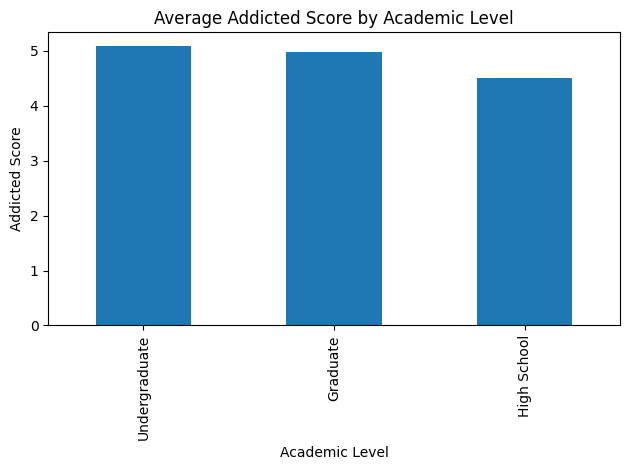

In [39]:
#aggregation of academic level by addicted score - specifically within the split dataset
academic_level = df_low_usage.groupby('Academic_Level')['Addicted_Score'].mean()

plt.figure()
academic_level.sort_values(ascending=False).plot(kind='bar')
plt.title("Average Addicted Score by Academic Level")
plt.ylabel("Addicted Score")
plt.xlabel("Academic Level")
plt.tight_layout()
plt.show();

There is very little difference in our addiction scores across academic levels in this grouping. The average addiction scores range between 4.5 and 5 here, with high school students actually having the lowest addiction scores. This does not match our hypothesis, nor does it align with patterns observed in the higher-usage dataset.

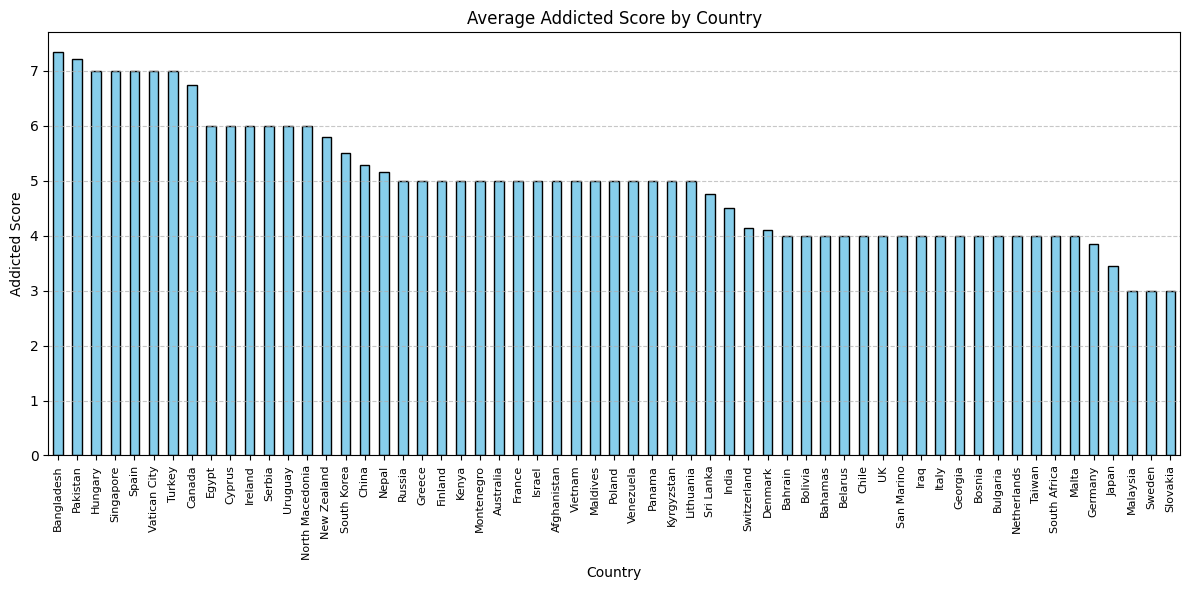

In [40]:
#addicted score by country
addicted_by_country = df_low_usage.groupby('Country')['Addicted_Score'].mean()

plt.figure(figsize=(12, 6))
addicted_by_country.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')

plt.title("Average Addicted Score by Country")
plt.ylabel("Addicted Score")
plt.xlabel("Country")
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

Despite higher overall addiction scores in the high-usage group, the numerical range between the highest and lowest scores remained nearly identical (a spread of 4 points) in both datasets. That means there’s similar variation in addiction levels, even if the averages are different.

# Final Conclusions

The trends observed in this dataset support the original hypothesis. Across both datasets, the relationships between social media addiction scores and other well-being indicators suggest that as addiction scores increase, indicators of personal and academic well-being tend to decrease.

In the group of students with higher average daily social media use, correlations were stronger and more consistent with expectations. While relationships in the lower-usage dataset were less pronounced, they still reflected the same overall trends.

We also observed a general pattern in which students at higher academic levels reported lower social media addiction scores than their peers at lower academic levels.

These findings provide meaningful insight into how addiction levels may reflect broader behavioral and emotional patterns and reinforce the importance of addressing social media usage in student well-being conversations.